In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams.update({'font.size': 14})

In [3]:
df = pd.read_csv("time_client_hello.csv")
df.head()

,Total Time,Init Time,Write to crypto stream,Unnamed: 3
0,6892071,6828703,26547,NaN
1,4731627,4609157,55545,NaN
2,2513281,2443544,31742,NaN
3,4956455,4816248,61829,NaN
4,2484594,2419406,29245,NaN


In [4]:
from matplotlib.ticker import FormatStrFormatter, LogFormatterMathtext
import matplotlib.ticker as mticker

class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)


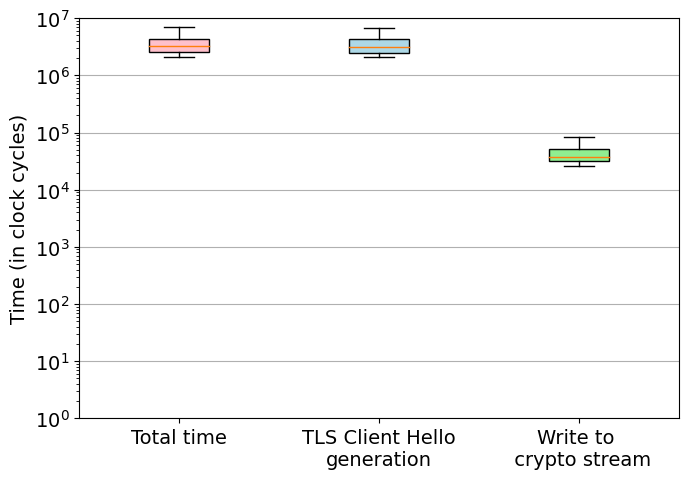

In [9]:
data = [df["Total Time"], df["Init Time"], df["Write to crypto stream"]]
 
fig = plt.figure(figsize =(6, 4))
 
# Creating axes instance
colors = ['pink', 'lightblue', 'lightgreen']

ax = fig.add_axes([0, 0, 1, 1])

xticks = []
ax.set_xticklabels(xticks)

ax.set_ylabel("Time (in clock cycles)")
ax.set_ylim([1e0, 1e7])
# ax.set_yticks([100000])#
ax.grid(axis="y")
# ax.grid(axis="y", which="minor")
ax.tick_params(axis='y', which='minor', labelsize=11)
# ax.tick_params(axis='y', which='major', labelsize=11)

ax.set_yscale("log")
# ax.yaxis.set_minor_formatter(MathTextSciFormatter("%1.0e"))
# ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))

# ax.minorticks_on()
bp = ax.boxplot(data, patch_artist=True, notch=False,showfliers=False, flierprops={'marker': 'o', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
# labels = ["TCP-TLS Packets", "QUIC Packets"]
# ax.legend([bp["boxes"][0], bp["boxes"][1]], labels, loc="lower right")
ax.set_xticks([1, 2, 3], ["Total time", "TLS Client Hello\ngeneration", "Write to \n crypto stream"])

plt.savefig('crypto_plot.pdf',bbox_inches='tight', dpi=150)
plt.show()